In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

# Data preprocessing


In [3]:
df = pd.read_csv('/content/drive/MyDrive/mbti_1.csv',encoding='latin-1')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
types = np.unique(df.type.values)
MBTI_TYPES = list(types)
MBTI_TYPES

['ENFJ',
 'ENFP',
 'ENTJ',
 'ENTP',
 'ESFJ',
 'ESFP',
 'ESTJ',
 'ESTP',
 'INFJ',
 'INFP',
 'INTJ',
 'INTP',
 'ISFJ',
 'ISFP',
 'ISTJ',
 'ISTP']

## Data Cleaning

In [5]:
import string
import re

def get_type_index(string):
    return list(types).index(string)

def clean_text(text):
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = [i for i in words if not "http" in i]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

In [6]:
df['cleaned_text'] = df['posts'].apply(clean_text)
df['type_index'] = df['type'].apply(get_type_index)

In [7]:
df.head()

,type,posts,cleaned_text,type_index
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,enfp and intj moments sportscenter not t...,8
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding the lack of me in these pos...,3
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one of course to which i say i ...,11
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the...,10
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired thats another silly misconcep...,2


In [8]:
df["cleaned_text"][0]

'enfp  and  intj  moments  sportscenter  not  top  ten  plays  pranks  what  has  been  the  most  lifechanging  experience  in  your  life  on  repeat  for  most  of  today  may  the  perc  experience  immerse  you  the  last  thing  my  infj  friend  posted  on  his  facebook  before  committing  suicide  the  next  day  rest  in  peace  hello  enfj7  sorry  to  hear  of  your  distress  its  only  natural  for  a  relationship  to  not  be  perfection  all  the  time  in  every  moment  of  existence  try  to  figure  the  hard  times  as  times  of  growth  as  84389  84390    welcome  and  stuff  game  set  match  prozac  wellbrutin  at  least  thirty  minutes  of  moving  your  legs  and  i  dont  mean  moving  them  while  sitting  in  your  same  desk  chair  weed  in  moderation  maybe  try  edibles  as  a  healthier  alternative  basically  come  up  with  three  items  youve  determined  that  each  type  or  whichever  types  you  want  to  do  would  more  than  likely  us

## Word Lemmatization


In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
lemmatizer = WordNetLemmatizer()
from nltk import word_tokenize, pos_tag

In [11]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#With the help of nltk.tokenize.WhitespaceTokenizer() method, we are able to extract the tokens from string of words or sentences without whitespaces

def lemmatize_text(text):
    wnl = WordNetLemmatizer()
    sent = text
    lemma_list = []
    for word, tag in pos_tag(word_tokenize(sent)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
                 lemma = word
                 lemma_list.append(lemma)
        else:
          lemma_list.append(lemmatizer.lemmatize(word, wntag))
    return lemma_list
     

In [13]:
df['text_lemmatized'] = df.cleaned_text.apply(lemmatize_text)

In [14]:
df.head()

,type,posts,cleaned_text,type_index,text_lemmatized
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,enfp and intj moments sportscenter not t...,8,"[enfp, and, intj, moment, sportscenter, not, t..."
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding the lack of me in these pos...,3,"[im, find, the, lack, of, me, in, these, post,..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one of course to which i say i ...,11,"[good, one, of, course, to, which, i, say, i, ..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the...,10,"[dear, intp, i, enjoy, our, conversation, the,..."
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired thats another silly misconcep...,2,"[youre, fire, thats, another, silly, misconcep..."


In [15]:
df["text_lemmatized"][0]

['enfp',
 'and',
 'intj',
 'moment',
 'sportscenter',
 'not',
 'top',
 'ten',
 'play',
 'prank',
 'what',
 'have',
 'be',
 'the',
 'most',
 'lifechanging',
 'experience',
 'in',
 'your',
 'life',
 'on',
 'repeat',
 'for',
 'most',
 'of',
 'today',
 'may',
 'the',
 'perc',
 'experience',
 'immerse',
 'you',
 'the',
 'last',
 'thing',
 'my',
 'infj',
 'friend',
 'post',
 'on',
 'his',
 'facebook',
 'before',
 'commit',
 'suicide',
 'the',
 'next',
 'day',
 'rest',
 'in',
 'peace',
 'hello',
 'enfj7',
 'sorry',
 'to',
 'hear',
 'of',
 'your',
 'distress',
 'its',
 'only',
 'natural',
 'for',
 'a',
 'relationship',
 'to',
 'not',
 'be',
 'perfection',
 'all',
 'the',
 'time',
 'in',
 'every',
 'moment',
 'of',
 'existence',
 'try',
 'to',
 'figure',
 'the',
 'hard',
 'time',
 'as',
 'time',
 'of',
 'growth',
 'as',
 '84389',
 '84390',
 'welcome',
 'and',
 'stuff',
 'game',
 'set',
 'match',
 'prozac',
 'wellbrutin',
 'at',
 'least',
 'thirty',
 'minute',
 'of',
 'move',
 'your',
 'leg',
 '

In [16]:
# Example of lemmatization: convert words back to original forms
lemmatizer = WordNetLemmatizer()
print("better", lemmatizer.lemmatize("better", "a"))
print("have", lemmatizer.lemmatize("have", "v"))
print("has", lemmatizer.lemmatize("has", "v"))

better good
have have
has have


## Distribution Identification





Personality types and their frequencies:
      posts  cleaned_text  type_index  text_lemmatized
type                                                  
INFP   1832          1832        1832             1832
INFJ   1470          1470        1470             1470
INTP   1304          1304        1304             1304
INTJ   1091          1091        1091             1091
ENTP    685           685         685              685
ENFP    675           675         675              675
ISTP    337           337         337              337
ISFP    271           271         271              271
ENTJ    231           231         231              231
ISTJ    205           205         205              205
ENFJ    190           190         190              190
ISFJ    166           166         166              166
ESTP     89            89          89               89
ESFP     48            48          48               48
ESFJ     42            42          42               42
ESTJ     39            3

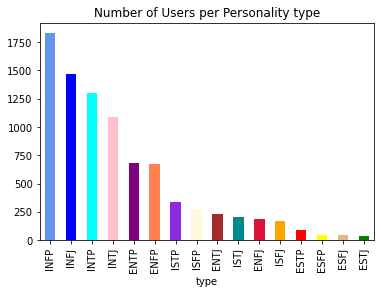

In [17]:
print('Personality types and their frequencies:')
types = df.groupby('type').count()
types.sort_values("posts", ascending=False, inplace=True)
print(types)
c = ["cornflowerblue", 'blue', "aqua",
"pink", "purple", "coral", "blueviolet" , "cornsilk", "brown", "darkcyan", "crimson",'orange', 'red', 'yellow',"burlywood", 'green']
types['posts'].plot(kind="bar", title="Number of Users per Personality type", color = c)

## Train-Validation-Test Split

In [18]:
# Split data
val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)


def train_val_test_split(df=None, train_percent=0.7, test_percent=0.15, val_percent=0.15):
  df = df.sample(frac=1)
  train_df = df[: int(len(df)*train_percent)]
  test_df = df[int(len(df)*train_percent)+1 : int(len(df)*(train_percent+test_percent))]
  val_df = df[int(len(df)*(train_percent + test_percent))+1 : ]
  return train_df, test_df, val_df

In [19]:
train_df, test_df, val_df = train_val_test_split(df, 0.7, 0.15, 0.15)
train_labels, train_texts = train_df.values[:,-2], train_df.values[:,-1]
val_labels, val_texts = val_df.values[:,-2], val_df.values[:,-1]
test_labels, test_texts = test_df.values[:,-2], test_df.values[:,-1]
print(len(train_df), len(test_df), len(val_df))
print(len(train_texts), len(train_labels), len(val_df))

6072 1300 1301
6072 6072 1301


In [20]:
train_labels

array([8, 11, 9, ..., 1, 7, 8], dtype=object)

In [21]:
train_texts[0] # if not specify index, train_texts will return a list of lists, each inner list is a text

['where',
 'would',
 'you',
 'live',
 'i',
 'could',
 'picture',
 'myself',
 'live',
 'most',
 'place',
 'especially',
 'smaller',
 'city',
 'that',
 'feel',
 'big',
 'but',
 'maybe',
 'more',
 'condensed',
 'than',
 'phoenix',
 'like',
 'i',
 'cant',
 'picture',
 'myself',
 'in',
 'la',
 'or',
 'nyc',
 'very',
 'i',
 'be',
 'vegan',
 'have',
 'be',
 'vegetarian',
 'for',
 '67',
 'year',
 'now',
 'and',
 'love',
 'it',
 'i',
 'looove',
 'food',
 'i',
 'feel',
 'more',
 'comfortable',
 'eat',
 'yummy',
 'vegan',
 'food',
 'but',
 'yeah',
 'it',
 'doesnt',
 'stop',
 'this',
 'foodie',
 'from',
 'try',
 'new',
 'thing',
 'i',
 'its',
 'funny',
 'because',
 'for',
 'the',
 'longest',
 'time',
 'grow',
 'up',
 'i',
 'be',
 'the',
 'rebellious',
 'fuck',
 'wait',
 'till',
 'marriage',
 'its',
 'probably',
 'gon',
 'na',
 'happen',
 'in',
 'a',
 'college',
 'dorm',
 'sometime',
 'unexpectedly',
 'and',
 'now',
 'that',
 'i',
 'be',
 'at',
 'this',
 'sometimes',
 'existentialist',
 'crisis',
 

In [22]:
train_df.head()

,type,posts,cleaned_text,type_index,text_lemmatized
2499,INFJ,'https://www.youtube.com/watch?v=3H2l9Lo-jPk||...,where would you live i could picture my...,8,"[where, would, you, live, i, could, picture, m..."
4432,INTP,"'Damn, why are you so desirable!!|||https://en...",damn why are you so desirable he is aw...,11,"[damn, why, be, you, so, desirable, he, be, aw..."
6387,INFP,'Fi is having your own values and trying to li...,fi is having your own values and trying...,9,"[fi, be, have, your, own, value, and, try, to,..."
2439,INTJ,"'tooboku More than anything, I identify you w...",tooboku more than anything i identify yo...,10,"[tooboku, more, than, anything, i, identify, y..."
5699,ISTJ,'Rave: I successfully negotiated for a higher ...,rave i successfully negotiated for a hig...,14,"[rave, i, successfully, negotiate, for, a, hig..."


In [23]:
# Convert train, validation and test set to csv files
train_df.to_csv('train.csv',index=False)
val_df.to_csv("valide.csv", index = False)
test_df.to_csv('test.csv',index=False)

## Bag of Words Techniques



In [24]:
import numpy as np
import itertools

## Creating a vectorizer to vectorize text and create matrix of features
## Bag of words technique
class Vectorizer():
    def __init__(self, max_features):
        self.max_features = max_features
        self.vocab_list = None
        self.token_to_index = None

    def fit(self, dataset):
        word_dict = {}
        for sentence in dataset:
            for token in sentence:
                if token not in word_dict:
                    word_dict[token] = 1
                else:
                    word_dict[token] += 1
        word_dict = dict(sorted(word_dict.items(), key=lambda item: item[1], reverse=True))
        end_to_slice = min(len(word_dict), self.max_features)
        word_dict = dict(itertools.islice(word_dict.items(), end_to_slice))
        self.vocab_list = list(word_dict.keys())
        self.token_to_index = {}
        counter = 0
        for token in self.vocab_list:
            self.token_to_index[token] = counter
            counter += 1


    def transform(self, dataset):
        data_matrix = np.zeros((len(dataset), len(self.vocab_list)))
        for i, sentence in enumerate(dataset):
            for token in sentence:
                if token in self.token_to_index:
                    data_matrix[i, self.token_to_index[token]] += 1
        return data_matrix

## max features - top k words to consider only
max_features = 2000 

vectorizer = Vectorizer(max_features=max_features)
vectorizer.fit(train_texts)

## Checking if the len of vocab = k 
X_train = vectorizer.transform(train_texts)
X_val = vectorizer.transform(val_texts)
X_test = vectorizer.transform(test_texts)

y_train = train_labels
y_val = val_labels
y_test = test_labels

vocab = vectorizer.vocab_list

In [25]:
X_train

array([[69., 33., 33., ...,  0.,  0.,  0.],
       [43., 31., 11., ...,  0.,  0.,  0.],
       [62., 58., 60., ...,  0.,  0.,  0.],
       ...,
       [70., 60., 58., ...,  0.,  0.,  0.],
       [91., 57., 36., ...,  0.,  0.,  0.],
       [59., 36., 39., ...,  2.,  0.,  0.]])

In [26]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 16)
y_test = to_categorical(y_test, 16)
y_val = to_categorical(y_val, 16)

In [27]:
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_val = X_val.reshape(-1, 1, X_val.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

y_train = y_train.reshape(-1, 16)
y_val = y_val.reshape(-1, 16)
y_test = y_test.reshape(-1, 16)

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')

X_train.shape: (6072, 1, 2000), y_train.shape: (6072, 16)


In [28]:
X_train.shape

(6072, 1, 2000)

# Pie Chart

In [29]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
def bag_of_words(group, type_label):
    posts = [t for t in group.get_group(type_label)['posts']]
    nlp = spacy.load('en_core_web_sm')
    count_tags = Counter()
    for posts_per_user in posts:
        doc = nlp(str(posts_per_user))
        count_tags.update(Counter([token.pos_ for token in doc]))
    return count_tags

def tags_pie_plot(count_tags):
    bag_of_tags = list(count_tags.keys())
    bag_of_tags_values = [count_tags.get(l) for l in bag_of_tags[:5]]
    
    fig = plt.pie(bag_of_tags_values, labels = bag_of_tags[:5], autopct = '%1.1f%%', startangle = 140)
    
    return fig

INFP


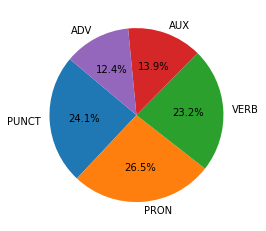

INFJ


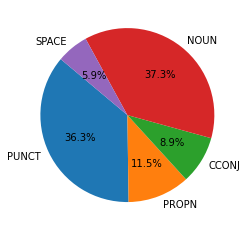

INTP


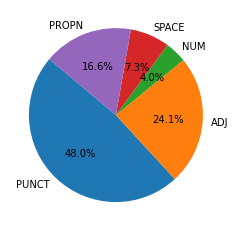

INTJ


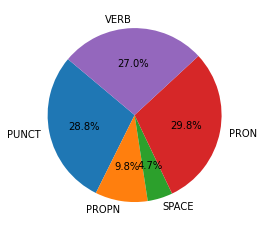

ENTP


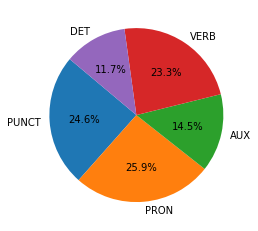

ENFP


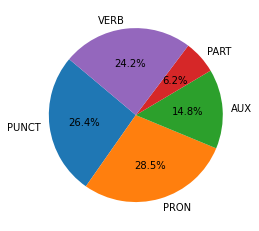

ISTP


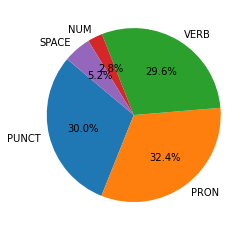

ISFP


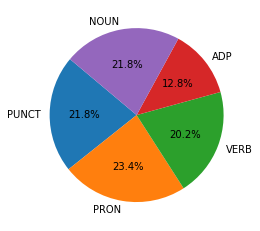

ENTJ


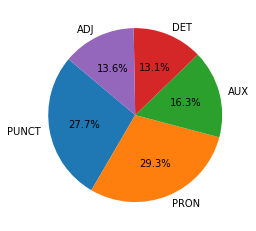

ISTJ


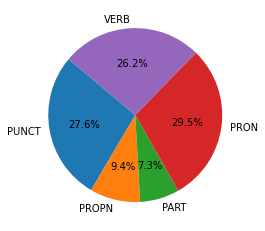

ENFJ


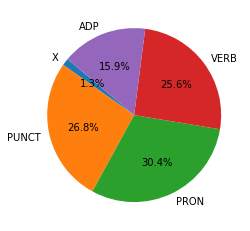

ISFJ


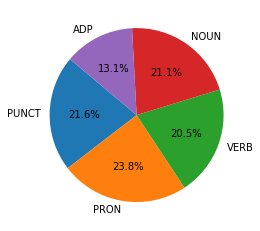

ESTP


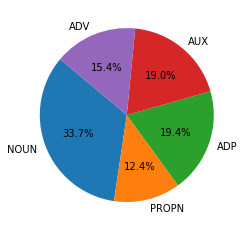

ESFP


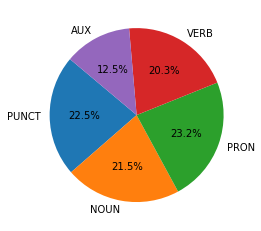

ESFJ


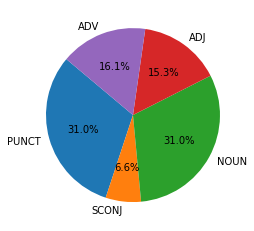

ESTJ


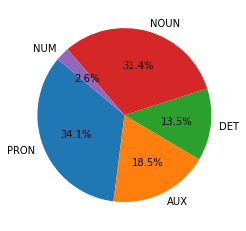

In [30]:
types_grouped = df.groupby('type')
pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
for t in pers_types:
    count_tags = bag_of_words(types_grouped, t)
    tags_pie_plot(count_tags)
    print(t)
    plt.show()

# Word Cloud

In [31]:
import os
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

In [32]:
stopWords = set(STOPWORDS)
names = df['type'].unique()
#add each lower case personality type as a stopword
for word in names:
    word.lower()
    stopWords.add(word.lower())
#Remove all of the most common words
moreWords =['lot', 'time', 'love', 'actually', 'seem', 'need', 'infj', 'actually', 'pretty', 'sure', 'thought','type', 'one', 'even', 'someone', 'thing','make', 
            'now', 'see', 'things', 'feel', 'think', 'i', 'people', 'know', '-', "much", "something", "will", "find", "go", "going", "need", 'still', 'though', 
            'always', 'through', 'lot', 'time', 'love', 'really', 'want', 'way', 'never', 'find', 'say', 'it.', 'good', 'me.', 'many', 'first', 'wp', 'go', 
            'really', 'much', 'why', 'youtube', 'right', 'know', 'want', 'tumblr', 'great', 'say', 'well', 'people', 'will', 'something', 'way', 'sure', 
            'especially', 'thank', 'friend', 'good', 'ye', 'person', 'https', 'watch', 'yes', 'got', 'take', 'person', 'life', 'might', 'me', 'me,', 'around', 'best', 'try', 
            'maybe', 'probability', 'usually', 'sometimes', 'trying', 'read', 'us', 'may', 'use', 'work', ':)', 'said', 'two', 'makes', 'little', 'quite','fe', 'u', 'intps', 'probably', 'made', 'it', 'seems', 'look', 'yeah',
           'different', 'come', 'it,', 'friends', 'entps', 'different', 'esfjs', 'look', 'infjs', 'estps', 'kind', 'intjs', 'enfjs', 
            'entjs', 'infps', 'every', 'long', 'tell', 'new', 'jpg', "laughing", "lol", "haha", "v", "d", "happy", "p", "posheagle"]

for i in moreWords:
    stopWords.add(i)

INFJ


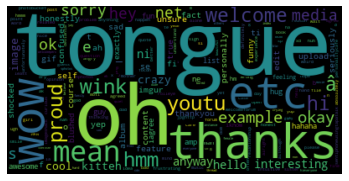

ENTP


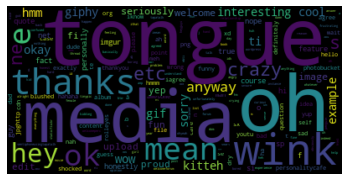

INTP


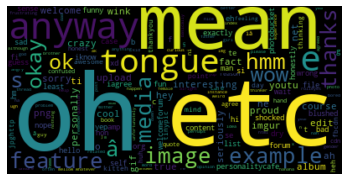

INTJ


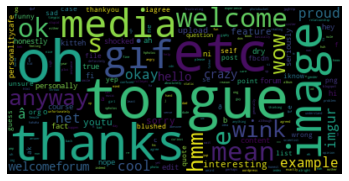

ENTJ


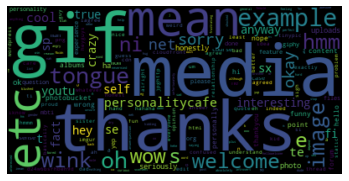

ENFJ


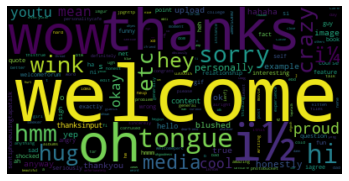

INFP


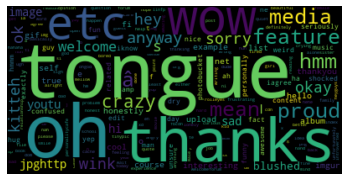

ENFP


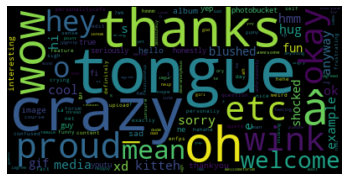

ISFP


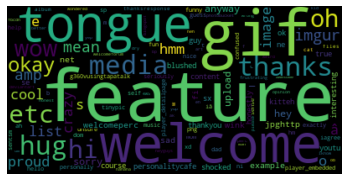

ISTP


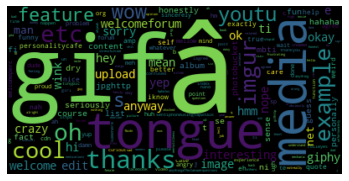

ISFJ


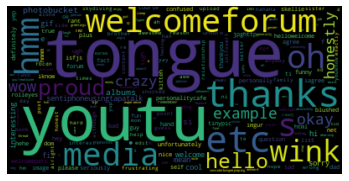

ISTJ


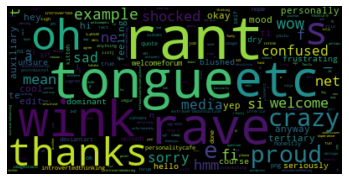

ESTP


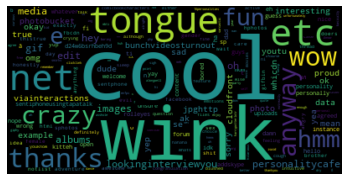

ESFP


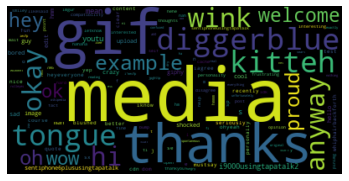

ESTJ


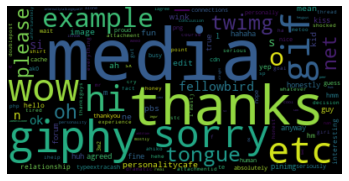

ESFJ


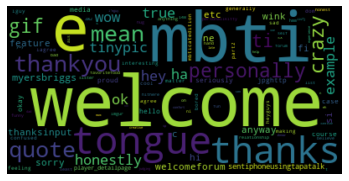

In [33]:
names = df['type'].unique()
i = 0
while i < len(names):
    for name in names:
        print(name)
        #filter by type
        specRows = df['type'] == name
        #combine the rows by type
        nameReturn = "".join(post for post in df[df["type"]== name].posts)
        nameReturn = nameReturn.lower()
        #make into a list to use comprehension to remove stopwords
        split = nameReturn.split()
        filtered_list = [word for word in split if word not in stopWords]
        filtered_words = "".join(filtered_list)
        #collocations = false to prevent duplicate words
        wordcloud = WordCloud(stopwords=stopWords, collocations=False).generate(filtered_words)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        i +=1       

# Hyperparameter Optimization with Hyperband


In [34]:
import tensorflow as tf
from tensorflow import keras
!pip install "ray[tune]"
import ray
from ray import tune
from ray.tune.integration.keras import TuneReportCallback
from ray.tune.schedulers import HyperBandScheduler
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# data normalization for models
layer = tf.keras.layers.Normalization(axis=None)
layer.adapt(X_train)
X_train = layer(X_train)

layer = tf.keras.layers.Normalization(axis=None)
layer.adapt(X_test)
X_test = layer(X_test)

X_train_expand = tf.expand_dims(X_train, axis=3, name=None)
X_test_expand = tf.expand_dims(X_test, axis=3, name=None)

## Hyperband Scheduler

In [36]:
hyperband_scheduler = HyperBandScheduler(
    time_attr='training_iteration',
    metric='mean_accuracy',
    mode='max',
    max_t=20,
    reduction_factor=3)

## Hyperband for RNN

In [37]:
def train_rnn(config):
   
    batch_size = 128
    num_classes = 10
    epochs = 12
    max_features = 2000 

    rnn = None
    rnn = Sequential([
        SimpleRNN(config["num_unit"], input_shape=(1, max_features)),
        Dropout(config["dropout"]),
        Dense(16, activation='softmax')])

    optimizer = Adam(config["lr"])
    rnn.compile(loss='categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])
    rnn.fit(X_train_expand, y_train,
            batch_size=config["batch_size"],
            validation_data=(X_val, y_val),
            callbacks=[TuneReportCallback({"mean_accuracy": "accuracy"})],
            epochs=epochs, verbose=0)

In [38]:
analysis2 = tune.run(
        train_rnn,
        name="exp",
        resources_per_trial={
            "gpu": 1,
        },
        config={
            "batch_size": tune.grid_search([32,64,128,256]),
            "dropout": tune.uniform(0,0.01),
            "lr": tune.uniform(0,0.01),
            "num_unit":tune.grid_search([200,300,400,500])
        },
        scheduler=hyperband_scheduler,
        verbose=1)

2022-12-19 02:39:29,793	WARNING worker.py:1851 -- Warning: The actor ImplicitFunc is very large (66 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(pid=112411) 2022-12-19 02:39:34.465647: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(pid=112721) 2022-12-19 02:39:49.898566: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(pid=112940) 2022-12-19 02:40:01.979427: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
(pid=113097) 2022-12-19 02:40:10.926583: W tenso

### Best trial for RNN

In [39]:
best_trial2 = analysis2.get_best_trial("mean_accuracy", "max", "last")
best_accuracy2 = best_trial2.metric_analysis["mean_accuracy"]["last"]
best_trial_config2 = best_trial2.config
print(best_trial_config2)
print(best_accuracy2)

{'batch_size': 128, 'dropout': 0.007136898197126854, 'lr': 0.0023089768015859824, 'num_unit': 400}
0.9685441255569458


## Hyperband for LSTM

In [40]:
def train_lstm(config):
   
    batch_size = 128
    num_classes = 10
    epochs = 12
    max_features = 2000 
    
    lstm = None
    lstm = Sequential([
        LSTM(config["num_unit"], input_shape=(1, max_features)),
        Dropout(config["dropout"]),
        Dense(16, activation='softmax')])

    optimizer = Adam(config["lr"])
    lstm.compile(loss='categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])
    lstm.fit(X_train_expand, y_train,
            batch_size=config["batch_size"],
            validation_data=(X_val, y_val),
            callbacks=[TuneReportCallback({"mean_accuracy": "accuracy"})],
            epochs=epochs, verbose=0)

In [41]:
analysis3 = tune.run(
        train_lstm,
        name="exp",
        resources_per_trial={
            "gpu": 1,
        },
        config={
            "batch_size": tune.grid_search([32,64,128,256]),
            "dropout": tune.uniform(0,0.01),
            "lr": tune.uniform(0,0.01),
            "num_unit":tune.grid_search([200,300,400,500])
        },
        scheduler=hyperband_scheduler,
        verbose=1)

2022-12-19 02:43:23,839	INFO hyperband.py:181 -- Bracket too small - Retrying...
2022-12-19 02:43:34,884	WARNING worker.py:1851 -- Warning: The actor ImplicitFunc is very large (66 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
2022-12-19 02:43:35,213	WARNING util.py:244 -- The `start_trial` operation took 1.403 s, which may be a performance bottleneck.
(pid=117660) 2022-12-19 02:43:39.690605: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-12-19 02:43:54,465	WARNING util.py:244 -- The `start_trial` operation took 0.529 s, which may be a performance bottleneck.
(pid=117973) 2022-12-19 02:43:58.955585: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWT

### Best trial for LSTM

In [42]:
best_trial3 = analysis3.get_best_trial("mean_accuracy", "max", "last")
best_accuracy3 = best_trial3.metric_analysis["mean_accuracy"]["last"]
best_trial_config3 = best_trial3.config
print(best_trial_config3)
print(best_accuracy3)

{'batch_size': 32, 'dropout': 0.008571282203193037, 'lr': 0.00031514247513580453, 'num_unit': 400}
0.9724966883659363


## Hyperband for GRU

In [43]:
def train_gru(config):
   
    batch_size = 128
    num_classes = 10
    epochs = 12
    max_features = 2000 
    
    gru = None
    gru = Sequential([
        GRU(config["num_unit"], input_shape=(1, max_features)),
        Dropout(config["dropout"]),
        Dense(16, activation='softmax')])

    optimizer = Adam(config["lr"])
    gru.compile(loss='categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])
    gru.fit(X_train_expand, y_train,
            batch_size=config["batch_size"],
            validation_data=(X_val, y_val),
            callbacks=[TuneReportCallback({"mean_accuracy": "accuracy"})],
            epochs=epochs, verbose=0)

In [44]:
analysis4 = tune.run(
        train_gru,
        name="exp",
        resources_per_trial={
            "gpu": 1,
        },
        config={
            "batch_size": tune.grid_search([32,64,128,256]),
            "dropout": tune.uniform(0,0.01),
            "lr": tune.uniform(0,0.01),
            "num_unit":tune.grid_search([200,300,400,500])
        },
        scheduler=hyperband_scheduler,
        verbose=1)

2022-12-19 02:48:47,504	INFO hyperband.py:181 -- Bracket too small - Retrying...
2022-12-19 02:48:58,738	WARNING worker.py:1851 -- Warning: The actor ImplicitFunc is very large (66 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
2022-12-19 02:48:58,904	WARNING util.py:244 -- The `start_trial` operation took 1.308 s, which may be a performance bottleneck.
(pid=123462) 2022-12-19 02:49:03.374996: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-12-19 02:49:17,518	WARNING util.py:244 -- The `start_trial` operation took 0.543 s, which may be a performance bottleneck.
(pid=123784) 2022-12-19 02:49:22.004834: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWT

### Best trial for GRU

In [45]:
best_trial4 = analysis4.get_best_trial("mean_accuracy", "max", "last")
best_accuracy4 = best_trial4.metric_analysis["mean_accuracy"]["last"]
best_trial_config4 = best_trial4.config
print(best_trial_config4)
print(best_accuracy4)

{'batch_size': 32, 'dropout': 0.008238287825168252, 'lr': 0.0007735319636339211, 'num_unit': 200}
0.988306999206543


## Hyperband for BiLSTM

In [46]:
def train_bilstm(config):
   
    batch_size = 128
    num_classes = 10
    epochs = 12
    max_features = 2000 
    
    bilstm = None
    bilstm = Sequential([
        Bidirectional(LSTM(config["num_unit"], input_shape=(1, max_features))),
        Dropout(config["dropout"]),
        Dense(16, activation='softmax')])

    optimizer = Adam(config["lr"])
    bilstm.compile(loss='categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])
    bilstm.fit(X_train, y_train,
            batch_size=config["batch_size"],
            validation_data=(X_val, y_val),
            callbacks=[TuneReportCallback({"mean_accuracy": "accuracy"})],
            epochs=epochs, verbose=0)

In [47]:
analysis5 = tune.run(
        train_bilstm,
        name="exp",
        resources_per_trial={
            "gpu": 1,
        },
        config={
             "batch_size": tune.grid_search([32,64,128,256]),
            "dropout": tune.uniform(0,0.01),
            "lr": tune.uniform(0,0.01),
            "num_unit":tune.grid_search([200,300,400,500])
        },
        scheduler=hyperband_scheduler,
        verbose=1)

2022-12-19 02:53:55,323	INFO hyperband.py:181 -- Bracket too small - Retrying...
2022-12-19 02:54:06,564	WARNING worker.py:1851 -- Warning: The actor ImplicitFunc is very large (66 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
2022-12-19 02:54:06,739	WARNING util.py:244 -- The `start_trial` operation took 1.320 s, which may be a performance bottleneck.
(pid=129048) 2022-12-19 02:54:11.212725: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-12-19 02:54:30,544	WARNING util.py:244 -- The `start_trial` operation took 0.537 s, which may be a performance bottleneck.
(pid=129364) 2022-12-19 02:54:35.072870: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWT

### Best trial for BiLSTM

In [48]:
best_trial5 = analysis5.get_best_trial("mean_accuracy", "max", "last")
best_accuracy5 = best_trial5.metric_analysis["mean_accuracy"]["last"]
best_trial_config5 = best_trial5.config
print(best_trial_config5)
print(best_accuracy5)

{'batch_size': 64, 'dropout': 0.0002926303008066078, 'lr': 0.0018976812805806776, 'num_unit': 400}
0.9929183125495911


# RNN vs. RNN with Attention Layer


## RNN

In [59]:
rnn = None
rnn = Sequential()
rnn.add(SimpleRNN(best_trial_config2["num_unit"], input_shape=(1, max_features)))
rnn.add(Dropout(best_trial_config2["dropout"]))
rnn.add(Dense(16, activation='softmax'))


optimizer = Adam(learning_rate=best_trial_config2["lr"])
rnn.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
print(rnn.summary())
history = rnn.fit(X_train, y_train,
          batch_size=best_trial_config2["batch_size"],
          validation_data=(X_val, y_val),
          epochs=12)
print(history.history.keys())
print()

train_score, train_acc = rnn.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score)
print('Train accuracy:', train_acc)
print()

score, acc = rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 400)               960400    
                                                                 
 dropout_10 (Dropout)        (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 16)                6416      
                                                                 
Total params: 966,816
Trainable params: 966,816
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/12
48/48 [==============================] - 1s 9ms/step - loss: 2.4426 - accuracy: 0.2833 - val_loss: 2.0775 - val_accuracy: 0.3213
Epoch 2/12
48/48 [==============================] - 0s 5ms/step - loss: 1.6226 - accuracy: 0.5199 - val_loss: 1.5618 - val_accuracy: 0.5442
Epoch 3/12
48/48 [=========

## RNN with Attention Layer

In [60]:
from keras.layers import *
from keras.models import *
from keras import backend as K
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

def create_RNN_with_attention():
    x=Input(shape=(1, max_features))
    RNN_layer = SimpleRNN(best_trial_config2["num_unit"], return_sequences=True)(x)
    attention_layer = attention()(RNN_layer)
    dropout = Dropout(best_trial_config2["dropout"])(attention_layer)
    outputs=Dense(16, trainable=True, activation='softmax')(dropout)
    model=Model(x,outputs)
    optimizer = Adam(learning_rate=best_trial_config2["lr"])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                metrics=['accuracy'])    
    return model

rnn_attention = create_RNN_with_attention()
print(rnn_attention.summary())
print()

history = rnn_attention.fit(X_train, y_train,
          batch_size=best_trial_config2["batch_size"],
          validation_data=(X_val, y_val),
          epochs=12)

train_score, train_acc = rnn_attention.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score)
print('Train accuracy:', train_acc)
print()
 
score, acc = rnn_attention.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 2000)]         0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 1, 400)            960400    
                                                                 
 attention_5 (attention)     (None, 400)               401       
                                                                 
 dropout_11 (Dropout)        (None, 400)               0         
                                                                 
 dense_11 (Dense)            (None, 16)                6416      
                                                                 
Total params: 967,217
Trainable params: 967,217
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/12
48/48 [=============================

# LSTM & LSTM with Attention Layer

## LSTM

In [62]:
lstm = None
lstm = Sequential()
lstm.add(LSTM(best_trial_config3["num_unit"], input_shape=(1, max_features)))
lstm.add(Dropout(best_trial_config3["dropout"]))
lstm.add(Dense(16, activation='softmax'))

optimizer = Adam(learning_rate=best_trial_config3["lr"])
lstm.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
print(lstm.summary())
history = lstm.fit(X_train, y_train,
          batch_size=best_trial_config3["batch_size"],
          validation_data=(X_val, y_val),
          epochs=10)
print(history.history.keys())
print()
train_score, train_acc = lstm.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score)
print('Train accuracy:', train_acc)
print()

score, acc = lstm.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 400)               3841600   
                                                                 
 dropout_13 (Dropout)        (None, 400)               0         
                                                                 
 dense_13 (Dense)            (None, 16)                6416      
                                                                 
Total params: 3,848,016
Trainable params: 3,848,016
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
190/190 [==============================] - 3s 6ms/step - loss: 1.9969 - accuracy: 0.3650 - val_loss: 1.8437 - val_accuracy: 0.4458
Epoch 2/10
190/190 [==============================] - 1s 4ms/step - loss: 1.3212 - accuracy: 0.6146 - val_loss: 1.5878 - val_accuracy: 0.5442
Epoch 3/10
190/190 

LSTM with Attention Layer

In [63]:
from keras.layers import *
from keras.models import *
from keras import backend as K
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

def create_LSTM_with_attention():
    x=Input(shape=(1, max_features))
    LSTM_layer = LSTM(best_trial_config3["num_unit"], return_sequences=True)(x)
    attention_layer = attention()(LSTM_layer)
    dropout = Dropout(best_trial_config3["dropout"])(attention_layer)
    outputs=Dense(16, trainable=True, activation='softmax')(dropout)
    model=Model(x,outputs)
    optimizer = Adam(learning_rate=best_trial_config3["lr"])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                metrics=['accuracy'])    
    return model

lstm_attention = create_LSTM_with_attention()
print(lstm_attention.summary())
print()

history = lstm_attention.fit(X_train, y_train,
          batch_size=best_trial_config3["batch_size"],
          validation_data=(X_val, y_val),
          epochs=12)

train_score, train_acc = lstm_attention.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score)
print('Train accuracy:', train_acc)
print()
 
score, acc = lstm_attention.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 2000)]         0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 400)            3841600   
                                                                 
 attention_6 (attention)     (None, 400)               401       
                                                                 
 dropout_14 (Dropout)        (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 16)                6416      
                                                                 
Total params: 3,848,417
Trainable params: 3,848,417
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/12
190/190 [=======================

# GRU & GRU with Attention Layer

## GRU

In [64]:
gru = None
gru = Sequential()
gru.add(GRU(best_trial_config4["num_unit"], input_shape=(1, max_features)))
gru.add(Dropout(best_trial_config4["dropout"]))
gru.add(Dense(16, activation='softmax'))

optimizer = Adam(learning_rate=best_trial_config4["lr"])
gru.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
print(gru.summary())
history = gru.fit(X_train, y_train,
          batch_size=best_trial_config4["batch_size"],
          validation_data=(X_val, y_val),
          epochs=10)
print(history.history.keys())
print()
train_score, train_acc = gru.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score)
print('Train accuracy:', train_acc)
print()

score, acc = gru.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 200)               1321200   
                                                                 
 dropout_15 (Dropout)        (None, 200)               0         
                                                                 
 dense_15 (Dense)            (None, 16)                3216      
                                                                 
Total params: 1,324,416
Trainable params: 1,324,416
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
190/190 [==============================] - 3s 6ms/step - loss: 1.9238 - accuracy: 0.3928 - val_loss: 1.6021 - val_accuracy: 0.5173
Epoch 2/10
190/190 [==============================] - 1s 4ms/step - loss: 1.2306 - accuracy: 0.6374 - val_loss: 1.8085 - val_accuracy: 0.4743
Epoch 3/10
190/190 

## GRU with Attention Layer

In [67]:
from keras.layers import *
from keras.models import *
from keras import backend as K
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

def create_GRU_with_attention():
    x=Input(shape=(1, max_features))
    GRU_layer = GRU(best_trial_config4["num_unit"], return_sequences=True)(x)
    attention_layer = attention()(GRU_layer)
    dropout = Dropout(best_trial_config4["dropout"])(attention_layer)
    outputs=Dense(16, trainable=True, activation='softmax')(dropout)
    model=Model(x,outputs)
    optimizer = Adam(learning_rate=best_trial_config4["lr"])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                metrics=['accuracy'])    
    return model

gru_attention = create_GRU_with_attention()
print(gru_attention.summary())
print()

history = gru_attention.fit(X_train, y_train,
          batch_size=best_trial_config4["batch_size"],
          validation_data=(X_val, y_val),
          epochs=10)

train_score, train_acc = rnn_attention.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score)
print('Train accuracy:', train_acc)
print()
 
score, acc = gru_attention.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1, 2000)]         0         
                                                                 
 gru_3 (GRU)                 (None, 1, 200)            1321200   
                                                                 
 attention_9 (attention)     (None, 200)               201       
                                                                 
 dropout_18 (Dropout)        (None, 200)               0         
                                                                 
 dense_18 (Dense)            (None, 16)                3216      
                                                                 
Total params: 1,324,617
Trainable params: 1,324,617
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/10
190/190 [=======================

# BiLSTM vs. BiLSTM with Attention Layer

## BiLSTM

In [68]:
BIlstm = None
BIlstm = Sequential()
BIlstm.add(Bidirectional(LSTM(best_trial_config5["num_unit"]), input_shape=(1, max_features)))
BIlstm.add(Dropout(best_trial_config5["dropout"]))
BIlstm.add(Dense(16, activation='softmax'))


optimizer = Adam(learning_rate=best_trial_config5["lr"])
BIlstm.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
print(BIlstm.summary())
history = BIlstm.fit(X_train, y_train,
          batch_size=best_trial_config5["batch_size"],
          validation_data=(X_val, y_val),
          epochs=12)
print(history.history.keys())
print()
train_score, train_acc = BIlstm.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score)
print('Train accuracy:', train_acc)
print()

score, acc = BIlstm.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 800)              7683200   
 l)                                                              
                                                                 
 dropout_19 (Dropout)        (None, 800)               0         
                                                                 
 dense_19 (Dense)            (None, 16)                12816     
                                                                 
Total params: 7,696,016
Trainable params: 7,696,016
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/12
95/95 [==============================] - 4s 14ms/step - loss: 1.9645 - accuracy: 0.3719 - val_loss: 1.7266 - val_accuracy: 0.4473
Epoch 2/12
95/95 [==============================] - 1s 6ms/step - loss: 1.2577 - accuracy: 0.632

## BiLSTM with Attention Layer

In [69]:
from keras.layers import *
from keras.models import *
from keras import backend as K
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

def create_BiLSTM_with_attention():
    x=Input(shape=(1, max_features))
    BiLSTM_layer = Bidirectional(LSTM(best_trial_config5["num_unit"], return_sequences=True))(x)
    attention_layer = attention()(BiLSTM_layer) 
    dropout = Dropout(best_trial_config5["dropout"])(attention_layer)
    outputs=Dense(16, trainable=True, activation='softmax')(dropout)
    model=Model(x,outputs)
    optimizer = Adam(learning_rate=best_trial_config5["lr"])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                metrics=['accuracy'])    
    return model

bilstm_attention = create_BiLSTM_with_attention()
print(bilstm_attention.summary())
print()

history = bilstm_attention.fit(X_train, y_train,
          batch_size=best_trial_config5["batch_size"],
          validation_data=(X_val, y_val),
          epochs=12)

train_score, train_acc = bilstm_attention.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score)
print('Train accuracy:', train_acc)
print()
 
score, acc = bilstm_attention.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1, 2000)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 1, 800)           7683200   
 nal)                                                            
                                                                 
 attention_10 (attention)    (None, 800)               801       
                                                                 
 dropout_20 (Dropout)        (None, 800)               0         
                                                                 
 dense_20 (Dense)            (None, 16)                12816     
                                                                 
Total params: 7,696,817
Trainable params: 7,696,817
Non-trainable params: 0
________________________________________________

# Conclusion

Overall Performance improve with the existence of attention layer. The model with the best test performance is BiLSTM with Attention Layer whereas the model with best train performance is normal BiLSTM